# The Shark Attack Data Cleaning.
(O como morir intentando limpiar la base de datos mas caótica de la historia)

La idea de este proyecto tiene, para mi, dos obejtivos:
 - Por una lado utilizar el conocimiento aprendido hasta el momento en limpieza de data frames con el fin de poner en prácticas dichos conocimientos y practicar.
 
 - Por otro lado quiero demostrar, de alguna manera, una de esas teorías que han pasado de generación en genración y es la de que los tiburones no suelen atacar a los seres humanos, no tiene esa intención letal que nos enseñó Steven Spielberg en su famosa JAWS, si no que suelen confundirnos con otros animales como por ejemplo las tortugas y por eso atacan más a los surferos.
 
 - Como bonus, si me gustaría intentar encontrar patrones de conducta de los animales, atendiendo a cuando y donde atacan más.
 
Es una tarea complicada, no lo voy a negar, le he echado un ojo al data frame y si hay algo que ya puedo decir como conclusión antes de empezar es: 

Introduzcan bien los datos!!!!

Empezamos importando todas las bibliotecas que conocemos y que creo que pueden ser útiles. Quizás no las use todas, pero más vale prevenir que curar.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np

import warnings
warnings.filterwarnings('ignore')


import pylab as plt  
import seaborn as sns

%matplotlib inline

In [2]:
sA_ori = pd.read_csv('../DataSets/attacks.csv', encoding ='latin1')
df = sA_ori.copy()
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [4]:
df.shape

(25723, 24)

In [5]:
df.duplicated().any()

True

In [6]:
df.describe(include='object').T

,count,unique,top,freq
Case Number,8702,6287,0,2400
Date,6302,5433,1957,11
Type,6298,8,Unprovoked,4595
Country,6252,212,USA,2229
Area,5847,825,Florida,1037
Location,5762,4108,"New Smyrna Beach, Volusia County",163
Activity,5758,1532,Surfing,971
Name,6092,5230,male,550
Sex,5737,6,M,5094
Age,3471,157,17,154


In [7]:
def check_nan(df: pd.DataFrame) -> None:
    
    """
    Recibe un dataframe y enseña el % de nulos y lo grafica
    """
    
    nan_cols = df.isna().mean() * 100  # % de valores nulos
    
    nan_cols = nan_cols[nan_cols>0]
    
    display(f'N nan cols: {len(nan_cols)}')
    display(nan_cols)
    
    
    # grafico de nulos en el dataframe

    #inicializa la figura
    plt.figure(figsize=(10, 6))  # 100X60  pixeles


    sns.heatmap(df.isna(),       # datos
                yticklabels=False,  # quita las etiquetas del eje y
                cmap='viridis',      # mapa de color
                cbar=False           # sin barra lateral
               )

    plt.show();

'N nan cols: 24'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

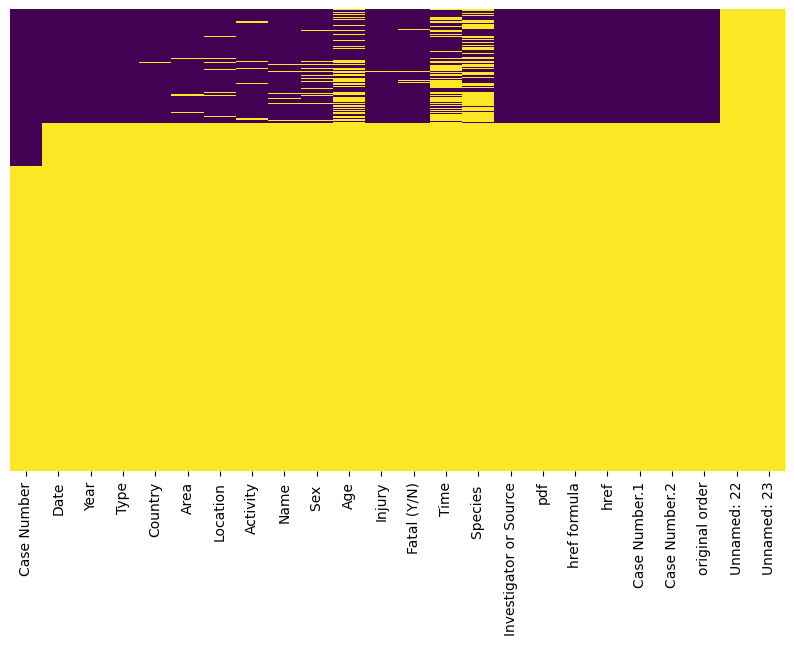

In [8]:
check_nan(df)

### Primeras impresiones.

Mirando la INFO del data frame, así a grosso modo, vemos que es un DF bastante sucio y, sobre todo, bastante despoblado. Donde, además, casi todas las columnas tienen un data type 'object', incluso cuando la lógica diría que deberían ser números enteros, o decimales o simplemente datos de fecha. 

Por lo tanto es interesante ver un poco qué datos hay metidos en las columnas y empezar a limpiar por ahí. Pero como podemos ver, hay dos columnas con "casi" todos los valores nulos, y las últimas filas de la base de datos no tiene absolutamente nada de información. 

Voy a empezar a ver qué hay en esas columnas, pero me interesa casi más saber qué datos hay en las filas donde sí hay datos.

Voy a echar un ojo para empezar por algo, pero a modo informativo, no voy a hacer nada con ello por ahora, a no ser que sea fácilmente explicable.

In [9]:
rows_with_values = df[df[['Unnamed: 22','Unnamed: 23']].notna().any(axis=1)]
rows_with_values

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,31,"No injury, shark bumped surfboard",N,16h00,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


Sería genial poder leet esos pdf pero al estar cortada la columna no me deja.

In [10]:
pd.set_option('display.max_colwidth', None)

Solo mirando estas tres filas ya vemos que aqui hay mucho dato que limpar, hay mucho dato con errores como el Case Number (algúna letra se ha colado por ahí...) y como tenemos otras dos columnas con Case Number.1 y .2, que "parecen ser" copias de la primera... pues seguro que también están bastante sucias. 

En lo referente a las columnas Unnamed: 22 y 23, no hay nada especialmente relevante, quiero decir, que no hay nada que pueda darnos claves del por qué están ahí, quizás observaciones o errores, pero no sabemos por ahora.

Empecemos limpiando un poco todas esas filas sin información que decía antes.

In [11]:
nulls_by_row = df.isnull().sum(axis=1)
nulls_by_row

0         2
1         3
2         3
3         4
4         4
         ..
25718    24
25719    24
25720    24
25721    24
25722    23
Length: 25723, dtype: int64

Al filtrar las filas por número de valores nulos podemos ver que bastantes filas estan completamente vacias. Teniendo en cuenta que solo hay 24 columnas, sería interesante quitarnos en primera instancia todas aquellas filas que no tengan NADA de información, no tienen sentido.

In [12]:
nulls_by_row.describe().T #quizas podamos quitarnos más filas de las que parecía.
#Teniendo en cuenta que la media de filas tiene unos 20 valores nulos, más o menos.

count    25723.000000
mean        18.982078
std          8.631545
min          2.000000
25%         23.000000
50%         24.000000
75%         24.000000
max         24.000000
dtype: float64

Quizás sea mejor quitarnos todas las filas que tengan más de 20 valores nulos....

In [13]:
df[df.isnull().sum(axis=1)>20].shape

(19421, 24)

In [14]:
list_of_rows_with_null = list(df[df.isnull().sum(axis=1)>20].index)
list_of_rows_with_null[:10]

[6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 6310, 6311]

In [15]:
df.drop(list_of_rows_with_null, inplace=True)

In [16]:
df.shape

(6302, 24)

'N nan cols: 18'

Case Number                0.015868
Year                       0.031736
Type                       0.063472
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal (Y/N)                8.552840
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
Unnamed: 22               99.984132
Unnamed: 23               99.968264
dtype: float64

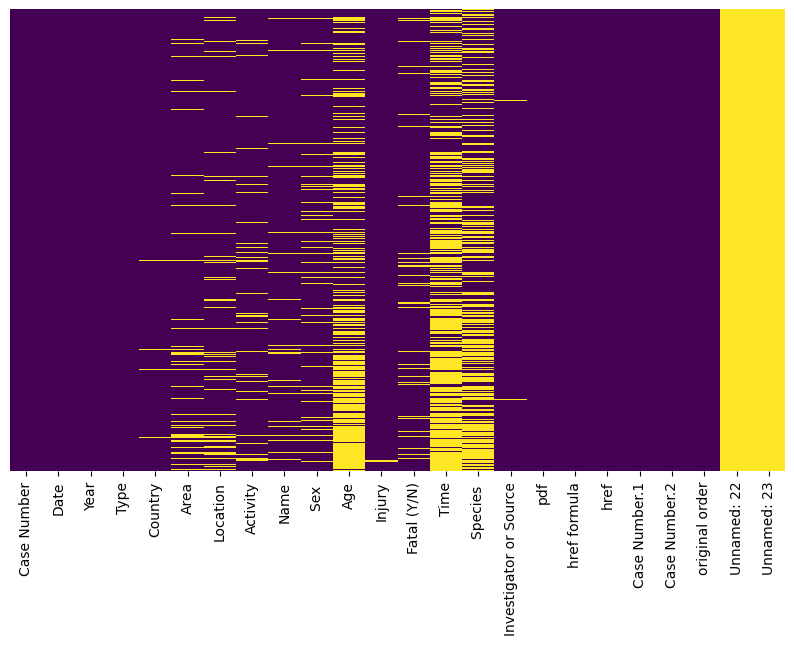

In [17]:
check_nan(df)

Nos hemos quitado casi 20k filas que no nos interesaban, como podemos ver en el gráfico superior, ahora tenemos una población de filas un poco más "normal", pero tenemos 6k más que mirar.

Seguimos teniendo esas dos columnas del final sin datos y también podemos apreciar que las columnas referentes a Age, Time y Species, están bastante vacias también. 

Así sin meterme mucho, puedo entender que sea dificil asegurar ciertos datos como puede ser la especie de tiburon, no en todos los ataques la persona es capaz de diferenciarlo o siquiera recordarlo con seguridad, por eso es fácil que muchos de los valores sean nulos y también es una columan fácil de llenar con valores desconocidas para quitarnos los nulos.

Lo mismo pasa con la edad, es raro que haya más datos en las columnas referentes al nombre y el sexo que en la de edad, parece lógico pensar que si tomas los datos del nombre, también tengas la edad, pero quizás no fuera importante a la hora de hacer esta base de datos.

El más preocupante serí la hora del día, ya que una de las cosas que me gustaría estudiar es cuando atacan más los tiburones, con el fin de ayudar a reducir los ataques.

Sin embargo, en la columna de Activity, sí que hay bastantes datos de los cuales podremos solucionar esa idea mia de que los tiburones cofunden a los bañistas/ surferos con tortugas.

In [18]:
df.columns = df.columns.str.replace(' ', '') #los espacios dentro de los nombres de las columnas me dificultan filtrarlos.

In [19]:
df.isna().sum()

CaseNumber                 1
Date                       0
Year                       2
Type                       4
Country                   50
Area                     455
Location                 540
Activity                 544
Name                     210
Sex                      565
Age                     2831
Injury                    28
Fatal(Y/N)               539
Time                    3354
Species                 2838
InvestigatororSource      17
pdf                        0
hrefformula                1
href                       0
CaseNumber.1               0
CaseNumber.2               0
originalorder              0
Unnamed:22              6301
Unnamed:23              6300
dtype: int64

Si triangulamos las columnas con más valores nulos, con las filas que tengan esas columnas vacías también podemos quitarnos unas cuantas filas inutiles.

Vamos a ver poco a poco aquellas columnas que tienen pocos valores nulos para llenarlos y luego nos metemos con los que tienen muchos valores nulos.

Empecemos por la columna con los Case Numbers que solo tiene un valor vacío.

In [20]:
df[df[['CaseNumber']].isna().any(axis=1)]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED INCIDENT,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1905.09.06.R-Curry.pdf,1905.09.06.R,1905.09.06.R,815.0,NaN,NaN


Este es fácil, ya que el case number está en los datos de las columnas CaseNumber.1 y .2. lo cambiamos y seguimos.

In [21]:
df.loc[5488, 'CaseNumber'] = df.loc[5488, 'CaseNumber.1']

In [23]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Year                       2
Type                       4
Country                   50
Area                     455
Location                 540
Activity                 544
Name                     210
Sex                      565
Age                     2831
Injury                    28
Fatal(Y/N)               539
Time                    3354
Species                 2838
InvestigatororSource      17
hrefformula                1
Unnamed:22              6301
Unnamed:23              6300
dtype: int64

Para continuar con los valores nulos es interesante ver que por lo que sabemos, esta base de datos se creó con ciertas columnas que tiene sentido entre ellas, principalmente las relevantes a CaseNumber, Date, Year, Case Number.1 y .2, por lo que podemos limpiar estas columnas y ver qué conseguimos.

In [24]:
df[['CaseNumber','Date','Year','CaseNumber.1','CaseNumber.2']]

,CaseNumber,Date,Year,CaseNumber.1,CaseNumber.2
0,2018.06.25,25-Jun-2018,2018.0,2018.06.25,2018.06.25
1,2018.06.18,18-Jun-2018,2018.0,2018.06.18,2018.06.18
2,2018.06.09,09-Jun-2018,2018.0,2018.06.09,2018.06.09
3,2018.06.08,08-Jun-2018,2018.0,2018.06.08,2018.06.08
4,2018.06.04,04-Jun-2018,2018.0,2018.06.04,2018.06.04
...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,ND.0005,ND.0005
6298,ND.0004,Before 1903,0.0,ND.0004,ND.0004
6299,ND.0003,1900-1905,0.0,ND.0003,ND.0003
6300,ND.0002,1883-1889,0.0,ND.0002,ND.0002


Empecemos con las columnas referentes a los CaseNumber. Me interesa saber si son iguales o si por el contrario son distintas.

In [25]:
df['CaseNumber'].equals(df['CaseNumber.1']),df['CaseNumber'].equals(df['CaseNumber.2']),df['CaseNumber.1'].equals(df['CaseNumber.2'])

(False, False, False)

Por lo visto no lo son. Veamos por qué.

In [26]:
df[df['CaseNumber'] != df['CaseNumber.1']].head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
34,2018.04.03,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,19,Lacerations to left knee & lower leg,N,15h00,White shark,"K. McMurray, TrackingSharks.com",2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.04.03-StFrancisBay.pdf,2018.04.02,2018.04.03,6269.0,NaN,NaN
117,2017.07.20.a,20-Jul-2017,2017.0,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,Rolf Geyling,M,50,"No injury, shark bit paddleboard",N,07h45,"White shark, 8' to 10'","R. Collier, GSAF",2017.07.20.a-Geyling.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.07.20.a-Geyling.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.07.20.a-Geyling.pdf,2017/07.20.a,2017.07.20.a,6186.0,NaN,NaN
144,2017.05.06,05-May-2017,2017.0,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,33,FATAL,Y,17h00,NaN,J. Rozada,2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.05.06-Rozada.pdf,2017.06.06,2017.05.06,6159.0,NaN,NaN
217,2016.09.15,16-Sep-2016,2016.0,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.16-BellsBeach.pdf,2016.09.16,2016.09.15,6086.0,NaN,NaN
314,2016.01.24.b,24-Jan-2016,2016.0,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,NaN,"Bruised ribs & tail bone, speargun broken and wetsuit cut",N,09h30 / 10h00,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.01.24.b-Love.pdf,2015.01.24.b,2016.01.24.b,5989.0,NaN,NaN


Mirando la tabla vemos que la relación que existe entre estas columnas es que el CaseNumber es el mismo que el de la última vez que se abre el caso, es decir el CaseNumber.2. Veamos entonces porque las columnas de CaseNumber y CaseNumber.2 no coinciden.

In [27]:
df[df['CaseNumber'] != df['CaseNumber.2']]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
390,2015.07-10,10-Jul-2015,2015.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,38,"No injury, shark bumped & damaged board",N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2015.07.10-Miskin.pdf,2015.07.10,2015.07.10,5913.0,NaN,NaN
4949,1934.01.08.R,Reported 08-Feb-1934,1934.0,Boating,TURKEY,Istanbul,"Haydarpasa jetty, Istanbul",Fishing,2 males,M,NaN,No injury,N,NaN,NaN,"C. Moore, GSAF",1924.02.08.R-Turkey.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1924.02.08.R-Turkey.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/1924.02.08.R-Turkey.pdf,1934.02.08.R,1934.02.08.R,1354.0,NaN,NaN
5944,1864.05,May-1864,1864.0,Unprovoked,MAURITIUS,300 miles east of Mauritius,NaN,Fell overboard,male from the whaler Albatross,M,NaN,FATAL,Y,NaN,NaN,"North Adams Transcript, 3/18/1898",1864.05.00.Mauritius.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1864.05.00.Mauritius.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1864.05.00.Mauritius.pdf,1864.05.00,1864.05.00,359.0,NaN,NaN


Vemos que la incosistencia está en la manera de escribir los datos. Algunos case number se han escrito con '-' y otros con '.', por lo que podemos limpiar un poco los datos de las columnas de CaseNumber,.1y .2, haciendo que la nomenclatura sea la misma para todos los valores, sustituyendo '_' por '.', donde los haya.

In [28]:
df['CaseNumber'] = df.CaseNumber.str.replace('-', '.')
df['CaseNumber.1'] = df['CaseNumber.1'].str.replace('-', '.')
df['CaseNumber.2'] = df['CaseNumber.2'].str.replace('-', '.')

In [29]:
df[df['CaseNumber'] != df['CaseNumber.2']]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
4949,1934.01.08.R,Reported 08-Feb-1934,1934.0,Boating,TURKEY,Istanbul,"Haydarpasa jetty, Istanbul",Fishing,2 males,M,NaN,No injury,N,NaN,NaN,"C. Moore, GSAF",1924.02.08.R-Turkey.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1924.02.08.R-Turkey.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/1924.02.08.R-Turkey.pdf,1934.02.08.R,1934.02.08.R,1354.0,NaN,NaN
5944,1864.05,May-1864,1864.0,Unprovoked,MAURITIUS,300 miles east of Mauritius,NaN,Fell overboard,male from the whaler Albatross,M,NaN,FATAL,Y,NaN,NaN,"North Adams Transcript, 3/18/1898",1864.05.00.Mauritius.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1864.05.00.Mauritius.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1864.05.00.Mauritius.pdf,1864.05.00,1864.05.00,359.0,NaN,NaN


In [30]:
df.loc[4949, 'CaseNumber'] = df.loc[4949, 'CaseNumber.2'] #me he dado cuenta de que el date es de febrero no enero-

In [31]:
df[df['CaseNumber'] != df['CaseNumber.2']]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
5944,1864.05,May-1864,1864.0,Unprovoked,MAURITIUS,300 miles east of Mauritius,NaN,Fell overboard,male from the whaler Albatross,M,NaN,FATAL,Y,NaN,NaN,"North Adams Transcript, 3/18/1898",1864.05.00.Mauritius.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1864.05.00.Mauritius.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1864.05.00.Mauritius.pdf,1864.05.00,1864.05.00,359.0,NaN,NaN


In [32]:
df.loc[5944, 'CaseNumber'] = df.loc[5944, 'CaseNumber.2'] #no influye en nada pero era útil para mi TOC.

In [33]:
df[df['CaseNumber'] != df['CaseNumber.2']]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23


Limpiando estos valores y buscando coincidencias, me he dado cuenta que los case numbers además de números también tienen letras, la mayoría no tienen aparentemente un criterio, excepto por las R que se refiere a cuando se supo del caso, pero no cuando se realizó el ataque: Reported.

In [34]:
df[df['CaseNumber'].str.contains('a|b|c|d|e|f|R')]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.b-FlatRock.pdf,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.a-daSilva.pdf,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.26.b-High.pdf,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.26.a-DaytonaBeach.pdf,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN
12,2018.05.13.b,13-May-2018,2018.0,Unprovoked,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Jei Turrell,M,10,Severe bite to right forearm,N,15h00,NaN,"C. Creswell, GSAF & K. McMurray TrackingSharks.com",2018.05.13.b-Turrell.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.13.b-Turrell.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.13.b-Turrell.pdf,2018.05.13.b,2018.05.13.b,6291.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164,1642.00.00.b,Late 1600s Reported 1728,1642.0,Invalid,GUINEA,NaN,NaN,Went overboard,crew member of the Nieuwstadt,M,NaN,FATAL,NaN,NaN,Questionable,"History of the Pyrates, by D. Defoe, Vol. 2, p.28",1642.00.00.b-Nieuwstadt.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1642.00.00.b-Nieuwstadt.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1642.00.00.b-Nieuwstadt.pdf,1642.00.00.b,1642.00.00.b,139.0,NaN,NaN
6165,1638.00.00.R,Reported 1638,1638.0,Unprovoked,NaN,NaN,NaN,NaN,sailors,M,NaN,NaN,UNKNOWN,NaN,NaN,Sir Thomas Herbert,1638.00.00.R-Herbert,http://sharkattackfile.net/spreadsheets/pdf_directory/1638.00.00.R-Herbert,http://sharkattackfile.net/spreadsheets/pdf_directory/1638.00.00.R-Herbert,1638.00.00.R,1638.00.00.R,138.0,NaN,NaN
6166,1637.00.00.R,Reported 1637,1637.0,Unprovoked,INDIA,West Bengal,Hooghly River mouth,Wading,Hindu pilgrims,NaN,NaN,NaN,UNKNOWN,NaN,NaN,"H. Edwards, p.31, citing Sebastian Manrique",1637.00.00.R-Manrique.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1637.00.00.R-Manrique.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1637.00.00-Manrique.pdf,1637.00.00.R,1637.00.00.R,137.0,NaN,NaN
6167,1617.00.00.R,Reported 1617,1617.0,Unprovoked,INDIA,West Bengal,Ganges Delta,NaN,Indian people,NaN,NaN,NaN,UNKNOWN,NaN,NaN,"H. Edwards, p.31, citing Samuel Purchas",1617.00.00-Purchas.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1617.00.00-Purchas.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1617.00.00-Purchas.pdf,1617.00.00.R,1617.00.00.R,136.0,NaN,NaN


En lo que se refiere a los case number no creo que merezca la pena seguir limpiando datos, ya hemos conseguido que las columnas tengan sentido entre ellas, que los valores coincidan y que por lo menos tengan algo de correlación.

Continuemos con los valores nulos.

In [35]:
nan_cols[nan_cols>0]

Year                       2
Type                       4
Country                   50
Area                     455
Location                 540
Activity                 544
Name                     210
Sex                      565
Age                     2831
Injury                    28
Fatal(Y/N)               539
Time                    3354
Species                 2838
InvestigatororSource      17
hrefformula                1
Unnamed:22              6301
Unnamed:23              6300
dtype: int64

In [36]:
df[df[['Year']].isna().any(axis=1)]  #vamos a quitarnos esos valores nulos del año que son sencillitos también.

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.01.08.R-KerryDaniel.pdf,2017.01.08.R,2017.01.08.R,6116.0,NaN,NaN
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1835.08.19.R-Whitehaven.pdf,1836.08.19.R,1836.08.19.R,224.0,NaN,NaN


In [51]:
df.loc[187, 'Year'] = 2017
df.loc[6079, 'Year'] = 1836

In [52]:
df[df[['Year']].isna().any(axis=1)]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23


In [53]:
df['Year'].unique()  #alguien ha introducido los datos del año como flotantes, como ejercicio los voy a cambiar a int

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988,
       1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976,
       1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871, 1870, 18

In [54]:
df['Year'] = df['Year'].astype(int)

In [55]:
df[['Year']].head()  #parece que funciona y tenemos los años como números interos y no flotantes.

,Year
0,2018
1,2018
2,2018
3,2018
4,2018


Tambien hemos visto en el unique() que hay años como el 77, 5 o el 0 por lo que sería interesante ver qué problema hay con esos datos.

In [56]:
yearZero = df[['CaseNumber','Date', 'Year']][df['Year']<100]

In [57]:
yearZero

,CaseNumber,Date,Year
6175,0077.00.00,77 A.D.,77
6176,0005.00.00,Ca. 5 A.D.,5
6177,0000.0214,Ca. 214 B.C.,0
6178,0000.0336,Ca. 336.B.C..,0
6179,0000.0493,493 B.C.,0
...,...,...,...
6297,ND.0005,Before 1903,0
6298,ND.0004,Before 1903,0
6299,ND.0003,1900-1905,0
6300,ND.0002,1883-1889,0


In [58]:
df['Year'].value_counts()[0]

125

De los 127 datos por debajo del año 100, hay 125 con valor 0 y solo 2 con valores 77 y 5.

Vemos también, que existen datos que se han introducido a través de lo que se ha encontrado en libros, pinturas en cuevas u otras fuentes y que esos ataques se han introducido con valores que empiezan con 'No Date' o 'ND'.

El problema de estos casos o ataques, (si miras un poco los pdf con la info correspondiente) es que son poco fiables, al no haber testigos ni datos concretos, son filas con casos que no estoy seguro tengan demaisado valor real existiendo casos más actuales y con mayor fiablidad. No las voy a quitar porque no dejan de ser interesantes, pero quiero mirar un poco más en profundidad.

In [59]:
df[df['Year'].isna()]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23


In [60]:
df[df['CaseNumber'].str.contains('ND')]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
6181,ND.0154,Before 1939,0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0154-Folsom.pdf,ND.0154,ND.0154,122.0,NaN,NaN
6182,ND.0153,1990 or 1991,0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Conway Plough & Dr. Jonathan Higgs,M,NaN,Conway's leg was bitten Higgs injury was FATAL,N,NaN,NaN,A.J. Venter,ND-0153-Plough-Higgs.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0153-Plough-Higgs.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0153-Plough-Higgs.pdf,ND.0153,ND.0153,121.0,NaN,NaN
6183,ND.0152,Before 2016,0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Hamisi Njenga,M,NaN,FATAL,Y,NaN,NaN,eadestination,ND-0152-Kenya.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0152-Kenya.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0152-Kenya.pdf,ND.0152,ND.0152,120.0,NaN,NaN
6184,ND.0151,Before Oct-2009,0,Unprovoked,PANAMA,Bocas del Toro Province,Red Frog Beach,Swimming/,male,M,20,FATAL,Y,NaN,NaN,C. Mendieta & A. Duarte,ND-0151-Panama.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0151-Panama.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0151-Panama.pdf,ND.0151,ND.0151,119.0,NaN,NaN
6185,ND.0150,Before 1934,0,Unprovoked,URUGUAY,Rocha,"Isla Chica, La Paloma",Swimming,NaN,NaN,NaN,Foot bitten,N,NaN,NaN,"Di Candia, 2004",ND-0150-Uruguay.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0150-Uruguay.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0150-Uruguay.pdf,ND.0150,ND.0150,118.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0005-RoebuckBay.pdf,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0004-Ahmun.pdf,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0003-Ocracoke_1900-1905.pdf,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0002-JulesPatterson.pdf,ND.0002,ND.0002,3.0,NaN,NaN


Llegados a este punto creo que es posible entender que esos años 0 representan la incertidumbre en la recogida de datos y como dentro de las 6000 filas que manejo ahora mismo, esos 125 no son especiamente representativos y pueden ser entendidos como valores 0 para no poner 'desconocido' y romper el patrón de números enteros.

In [63]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Type                       4
Country                   50
Area                     455
Location                 540
Activity                 544
Name                     210
Sex                      565
Age                     2831
Injury                    28
Fatal(Y/N)               539
Time                    3354
Species                 2838
InvestigatororSource      17
hrefformula                1
Unnamed:22              6301
Unnamed:23              6300
dtype: int64

Todavía tenemos muchos datos nulos, pero poco a poco. Vamos a ver la columna Type a ver qué pasa por ahí.

In [64]:
df[df[['Type']].isna().any(axis=1)]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
85,2017.09.15.a,15-Sep-2017,2017,NaN,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,NaN,Injuries to hands and legs,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.09.15.a-Samoa.pdf,2017.09.15.a,2017.09.15.a,6218.0,NaN,NaN
382,2015.07.27,27-Jul-2015,2015,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2015.07.27-Victoria.pdf,2015.07.27,2015.07.27,5921.0,NaN,NaN
4867,1936.09.11.R,Reported 11-Sep-1936,1936,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,NaN,FATAL,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1936.09.11-Saigon.pdf,1936.09.11.R,1936.09.11.R,1436.0,NaN,NaN
5705,1890.03.03.R,Reported 03-Mar-1890,1890,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,NaN,FATAL,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1890.03.03.R-Ceylon.pdf,1890.03.03.R,1890.03.03.R,598.0,NaN,NaN


In [65]:
df['Type'].value_counts()

Type
Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: count, dtype: int64

En este caso no tenemos información del tipo de ataque, mirando los tipos que hay, no parece haber un criterio, no es que estén catalogados por provocados o no simplemente, si no que hay 7 posibles opciones o inputs, asi que tenemos dos opciones, o bien le ponemo 'unknown', porque no sabemos el dato o nos leemos los 87 pdf a ver si dice algo, pero comno no hay criterio establecido y por lo tanto no tiene mucho valor estadístico, podemos poner unknow directamente.

In [66]:
df[df[['Type']].isna().any(axis=1)].index #buscamos los índices de esas filas desconocidas y los cambiamos.

Index([85, 382, 4867, 5705], dtype='int64')

In [67]:
unknownIndex = list(df[df[['Type']].isna().any(axis=1)].index)
unknownIndex

[85, 382, 4867, 5705]

In [68]:
df.loc[unknownIndex, 'Type'] = 'Unknown'

In [69]:
df.loc[unknownIndex, 'Type']  # perfect

85      Unknown
382     Unknown
4867    Unknown
5705    Unknown
Name: Type, dtype: object

In [72]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

Country                   50
Area                     455
Location                 540
Activity                 544
Name                     210
Sex                      565
Age                     2831
Injury                    28
Fatal(Y/N)               539
Time                    3354
Species                 2838
InvestigatororSource      17
hrefformula                1
Unnamed:22              6301
Unnamed:23              6300
dtype: int64

## Pequeño inciso en los valores nulos.

Trabajando con la base de datos me he dado cuenta de que existe un problema con los links a los pdf de los casos estudiados. No es molesto a la hora de hacer un análisis de datos, pero si es interesante limpiarlo para poder usar algunas funciones distintas.

En principio, las dos columnas deberían tener el mismo dato, que se traduce en root de la web directorio y el nombre del pdf, por lo que podemos hacer una función que nos ayude a unir el root de la web con la columna de pdf que no tiene registros vacios.

In [73]:
df[df['hrefformula'] != df['href']].head() #algunas de los valores introducidos son erroneos como podemos ver.

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
50,2018.01.13,13-Jan-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Martin Islet,Free diving,Callum Stewart,M,28,"No injury, shark took his swimfin",N,NaN,"White shark, 3.5 m","B. Myatt, GSAF",2018.01.13-Stewart.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.01.13-Stewart.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2018.01.13-Stewart.pdf,2018.01.13,2018.01.13,6253.0,NaN,NaN
96,2017.08.29,29-Aug-2017,2017,Unprovoked,AUSTRALIA,Victoria,Cathedral Rock,Surfing,Marcel Brundler,M,37,"No injury, board bitten",N,10h30,"White shark, 3 m","B. Myatt, GSAF",2017.08.27-Brundler.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.08.27-Brundler.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.08.27-Brundler.pdf,2017.08.29,2017.08.29,6207.0,NaN,NaN
131,2017.06.05,2017.06.05,2017,Unprovoked,FRENCH POLYNESIA,Marquesas,"Atuona Bay, Hiva Oa Island",Surfing,male,M,NaN,Injuries to hand and wrist,N,NaN,NaN,"Tahiti Infos, 6/6/2017",2017.06.05-FrenchPolynesia.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.05-FrenchPolynesia.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.05-FrenchPolynesia.pdf,2017.06.05,2017.06.05,6172.0,NaN,NaN
133,2017.06.11,11-Jun-2017,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.11-Goff.pdf,2017.06.11,2017.06.11,6170.0,NaN,NaN
141,2017.05.27,27-May-2017,2017,Invalid,AUSTRALIA,New South Wales,Evans Head,Fishing,Terry Selwood,M,73,Abrasion to right forearm from pectoral fin of a shark that leapt into his boat,N,NaN,NaN,"B. Myatt, GSAF",2017.05.27-Selwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.05.27-Selwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.05.27-Selwood.pdf,2017.05.27,2017.05.27,6162.0,NaN,NaN


In [74]:
root = 'http://sharkattackfile.net/spreadsheets/pdf_directory/'
df['hrefformula'] = df.apply(lambda row: root + row['pdf'], axis=1)
df['href'] = df.apply(lambda row: root + row['pdf'], axis=1)

In [77]:
df.head(1) #comprobamos que ha funcionado

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,2018.06.25,2018.06.25,6303.0,NaN,NaN


De esta forma homgeneizamos la columna y al estar tomados los datos de los nombres de los pdf originales, no hay lugar a error en el link establecido. Sin haberlo limpiado el acceso a algunos ficheros no era posible o se confundian entre ellos.

Continuemos con los valores nulos y erroneos. Creo que es buen momento de meterno con la columna 'Time'. Desde el punto de vista del dato, me parece que junto con Country, Age, Activity and Spicies, son las columnas para un analisis de datos sobre las costumbres de los tiburones, los momentos en los ue más ataca y quizás también saber por qué.      

In [78]:
nan_cols= df.isna().sum()
nan_cols[nan_cols>0]

Country                   50
Area                     455
Location                 540
Activity                 544
Name                     210
Sex                      565
Age                     2831
Injury                    28
Fatal(Y/N)               539
Time                    3354
Species                 2838
InvestigatororSource      17
Unnamed:22              6301
Unnamed:23              6300
dtype: int64

In [ ]:
df.isna().sum()

In [ ]:
df[['Fatal(Y/N)']].isna().describe().T

In [ ]:
df[df[['Fatal(Y/N)']].isna().any(axis=1)]

In [ ]:
df['Fatal(Y/N)'].unique()

In [ ]:
df[df['Fatal(Y/N)']=='M']

In [ ]:
df[df['Fatal(Y/N)']=='2017']

In [ ]:
df[df['Fatal(Y/N)']=='y']

In [ ]:
df['Fatal(Y/N)'] = df['Fatal(Y/N)'].str.replace(' ', '')

In [ ]:
df['Fatal(Y/N)'] = df['Fatal(Y/N)'].str.upper()

In [ ]:
df['Fatal(Y/N)'].unique()

In [ ]:
df.loc[[285,786], 'Fatal(Y/N)']='N'

In [ ]:
df['Fatal(Y/N)'].unique()

In [ ]:
df['Fatal(Y/N)'].value_counts()['UNKNOWN']

In [ ]:
df['Fatal(Y/N)'].isna().sum()+df['Fatal(Y/N)'].value_counts()['UNKNOWN']

In [ ]:
df[['Fatal(Y/N)']].describe().T

LLegados a este punto podría ir uno a uno mirando esos casos y mirando porque seguro que muchos de ellos tienen información en las columnas de Injury o en los pdf, pero llegado a este punto creo que 610 casos no van a cambiar el resultado de mi teoría, ya que como podemos ver más de 5700 casos no acabaron con la muerte del atacado.

Por eso mismo y con el fín de no perder credibilidad en los datos, he tomado la determinación de llenar esos valores con UNKNOWN, ya que existía dicho valor.

In [ ]:
df[['Fatal(Y/N)']].fillna('UNKNOWN', inplace=True)

In [ ]:
df[['Fatal(Y/N)']].isna().sum()

In [ ]:
df['Fatal(Y/N)'] = df[['Fatal(Y/N)']].fillna('UNKNOWN')

In [ ]:
df.isna().sum()

In [ ]:
check_nan(df)

In [ ]:
df[['Activity']].value_counts()

In [ ]:
activity = list(df[df[['Activity']].isna().any(axis=1)].index)

In [ ]:
df.loc[activity]

In [ ]:
df.loc[activity, 'Activity'] = 'Unknown'

In [ ]:
df.loc[activity]

In [ ]:
nan_cols = df.isna().sum()

nan_cols[nan_cols>0]

In [ ]:
df[df['Country'].isnull()]

In [ ]:
df['Country'] = df[['Country']].fillna('UNKNOWN')

In [ ]:
df.Country.unique()

In [ ]:
df.isna().sum()

In [ ]:
check_nan(df)

## Limpieza de la columna Time y primer análisis con interés estadístico.

Recordemos que una de las cosas que quería conocer, con el find de poder establecer algunas recomendaciones para evitar los ataques de tiburón, era conocer los hábitos de los tiburones en general, estableciendo el momento del día donde más ataques se producen.

In [79]:
df['Time'].value_counts()

Time
Afternoon      187
11h00          128
Morning        121
12h00          109
15h00          108
              ... 
14h37            1
10h07            1
13h53            1
13h23            1
19h00-20h00      1
Name: count, Length: 366, dtype: int64

Esta es una columan interesante, desde el punto de vista del análisis, quizás no sea tan necesaria la exactitud con la hora a la que se cometió el ataque si no el momento del día. Con esto quiero decir sea mas útil generlizar y proponer, mañana, tarde y noche (morning, afternoon, evening and night, por hacerlo inglés) que luego a la hora de analizar parace más útil.

Como podemos ver en los valores únicos, no hay mucha consistencia en la manera de introducir el dato y, aunque ya hay muchos inputs con los valores que propongo, también hay muchos horarios que están escritos como strings con la 'h' para limitar la hora.
Voy a empezar cambiando esos valores por '.' para poder convertirlos en flotantes y así tratarlo como números y darles sentido.

In [80]:
df['Time'] = df['Time'].str.replace('h', '.')
df['Time']

0               18.00
1       14.00  -15.00
2               07.45
3                 NaN
4                 NaN
            ...      
6297              NaN
6298              NaN
6299              NaN
6300              NaN
6301              NaN
Name: Time, Length: 6302, dtype: object

In [82]:
df.Time.unique()

array(['18.00', '14.00  -15.00', '07.45', nan, 'Late afternoon', '17.00',
       '14.00', 'Morning', '15.00', '08.15', '11.00', '10.30', '10.40',
       '16.50', '07.00', '09.30', 'Afternoon', '21.50', '09.40', '08.00',
       '17.35', '15.30', '07.30', '19.00, Dusk', 'Nig.t', '16.00',
       '15.01', '12.00', '13.45', '23.30', '09.00', '14.30', '18.30',
       '12.30', '16.30', '18.45', '06.00', '10.00', '10.44', '13.19',
       'Midday', '13.30', '10.45', '11.20', '11.45', '19.30', '08.30',
       '15.45', 'S.ortly before 12.00', '17.34', '17.10', '11.15',
       '08.50', '17.45', '13.00', '10.20', '13.20', '02.00', '09.50',
       '11.30', '17.30', '9.00', '10.43', 'After noon', '15.15', '15.40',
       '19.05', '1300', '14.30 / 15.30', '22.00', '16.20', '14.34',
       '15.25', '14.55', '17.46', 'Morning ', '15.49', '19.00',
       'Midnig.t', '09.30 / 10.00', '10.15', '18.15', '04.00', '14.50',
       '13.50', '19.20', '10.25', '10.45-11.15', '16.45', '15.52',
       '06.15', '14.

Como podemos ver el resultado es que ahora tenemos mucho inputs en un formato que se puede parecer al de los números decimales, de esta manera quizás pueda escribir una función que trabaje convirtiendo esos números decimales en momentos del día.

Pero antes tenemos que homogeneizar un poco los datos para que entren más valores en la función.

Me he dado cuenta de que algunos valores empiezan por > por lo que deberíamos limpiarlo un poco.

In [83]:
df['Time']=df['Time'].str.replace('>', '')
df['Time']=df['Time'].str.replace('<', '')
df['Time']=df['Time'].str.replace('--', '-')

In [84]:
df.Time.unique()

array(['18.00', '14.00  -15.00', '07.45', nan, 'Late afternoon', '17.00',
       '14.00', 'Morning', '15.00', '08.15', '11.00', '10.30', '10.40',
       '16.50', '07.00', '09.30', 'Afternoon', '21.50', '09.40', '08.00',
       '17.35', '15.30', '07.30', '19.00, Dusk', 'Nig.t', '16.00',
       '15.01', '12.00', '13.45', '23.30', '09.00', '14.30', '18.30',
       '12.30', '16.30', '18.45', '06.00', '10.00', '10.44', '13.19',
       'Midday', '13.30', '10.45', '11.20', '11.45', '19.30', '08.30',
       '15.45', 'S.ortly before 12.00', '17.34', '17.10', '11.15',
       '08.50', '17.45', '13.00', '10.20', '13.20', '02.00', '09.50',
       '11.30', '17.30', '9.00', '10.43', 'After noon', '15.15', '15.40',
       '19.05', '1300', '14.30 / 15.30', '22.00', '16.20', '14.34',
       '15.25', '14.55', '17.46', 'Morning ', '15.49', '19.00',
       'Midnig.t', '09.30 / 10.00', '10.15', '18.15', '04.00', '14.50',
       '13.50', '19.20', '10.25', '10.45-11.15', '16.45', '15.52',
       '06.15', '14.

In [87]:
def timeTable(x):
    
    timelst = ['morning','afternoon','evening','night']
    

    try:
        if x in timelst:
            return x

        elif '-' in x:

            y = x.split('-')
            z = []
            for i in y:
                z.append(float(i))

            z2 = np.mean(z)

            if z2 >= 5.00 and z2 <= 11.59:

                return 'morning'

            elif z2 >= 12.00 and z2 <= 17.59:
                return 'afternoon'

            elif z2 >= 18.00 and z2 <= 20.59:
                return 'evening'

            elif z2 >= 21.00 and z2 <= 4.59:
                return 'night'

        elif '.' in x:
            x = float(x)
            if x >= 5.00 and x <= 11.59:

                return 'morning'

            elif x >= 12.00 and x <= 17.59:
                return 'afternoon'

            elif x >= 18.00 and x <= 20.59:
                return 'evening'

            elif x >= 21.00 and x <= 4.59:
                return 'night'
    except:
        return x

In [89]:
df.Time = df.Time.apply(timeTable)

In [90]:
df.Time.unique()

array(['evening', 'afternoon', 'morning', nan, None, '19.00, Dusk',
       'Nig.t', 'S.ortly before 12.00', '14.30 / 15.30', 'Midnig.t',
       '09.30 / 10.00', 'Sometime between 06.00 & 08.oo', 'A.M.',
       'Lunc.time', 'Before 07.00', '"Just before 11.00"',
       'Between 05.00 and 08.00', '17.00 or 17.40', '-',
       'Just after 12.00', 'S.ortly after midnig.t', '20.45 (Sunset)',
       'P.M.', 'S.ortly before 13.00',
       'Possibly same incident as 2000.08.21', '2 .ours after Opperman',
       '11.00 / 11.30', '"Nig.t"', '18.30?',
       '30 minutes after 1992.07.08.a', 'Between 06.00 & 07.20',
       '17.00 Sunset', 'Nig.tfall', '18.30 (Sunset)', 'Prior to 10.37',
       'Mid-morning', '16.30 or 18.00', '10.00 / 11.00', '"After lunc."',
       '15.00 or 15.45', '19.00 / 20.00', '12.45 / 13.45', 'nig.t',
       '09.30 / 15.30', '08.00 / 09.30', '12.00 to 14.00', 'Late nig.t',
       '10.30 or 13.30', '15.00j', 'Midday.', '10.00 or 14.00',
       '2 .rs before sunset', '18.15 

La función hace su trabajo, he tenido que usar un poco de magia con try - except porque no todos los valores entran en mi linea de código, pero como estamos probando lo aprendido, me doy por satisfecho al utilizar algunas de las cosas nuevas. Podemos ver que han bajado bastante la lista de valores únicos.

In [93]:
df.Time.value_counts()

Time
afternoon                                                                1306
morning                                                                   772
evening                                                                   208
Nig.t                                                                      62
A.M.                                                                       12
P.M.                                                                       12
-                                                                           5
Midnig.t                                                                    4
11.01 -time of s.ip sinking                                                 1
10.00 / 11.00                                                               1
"After lunc."                                                               1
After midnig.t                                                              1
15.00 or 15.45                                             

Esta va a ser una columna dificil, hay mucho, pero que mucho valor random. 
Aunque sea tedioso, voy a ir limpiando uno a uno los valores con el fin de obtener algo homogéneo.
Pero ya podemos observar el despunte de afternoon por encima del resto. Recordemos que esta columan tiene algo más de los valores nulos y que por lo tanto no podemos contar con todos los datos deseados, pero creo que puede ser representativo.

Vamos a ir limpiando esos datos lo máximo posible con el fin de poder analizarlos sin problema.

In [94]:
lstNight = list(df[df['Time']=='Nig.t'].index)

In [95]:
df.loc[lstNight, 'Time'] = 'night'

In [96]:
df.loc[lstNight, 'Time']

41      night
85      night
459     night
532     night
581     night
        ...  
5888    night
5910    night
5981    night
6092    night
6160    night
Name: Time, Length: 62, dtype: object

In [98]:
am=list(df[df['Time']=='A.M.'].index)

In [99]:
df.loc[am, 'Time'] = 'morning'

In [100]:
df.loc[am, 'Time']

979     morning
2517    morning
3495    morning
3834    morning
4088    morning
4286    morning
4570    morning
4611    morning
5225    morning
5293    morning
5306    morning
5807    morning
Name: Time, dtype: object

In [101]:
df.Time.value_counts()

Time
afternoon                                                                1306
morning                                                                   784
evening                                                                   208
night                                                                      62
P.M.                                                                       12
-                                                                           5
Midnig.t                                                                    4
10.00 / 11.00                                                               1
"After lunc."                                                               1
15.00 or 15.45                                                              1
10.30 or 13.30                                                              1
12.45 / 13.45                                                               1
nig.t                                                      

In [102]:
pm=list(df[df['Time']=='P.M.'].index)

In [103]:
df.loc[pm, 'Time'] = 'evening'

In [105]:
df[df.Time.str.contains('Between')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

Quiero corregir esos valores que están introducidos como 'Between' y para eso utilizo .str. 
No me deja buscarlos porque hay valores nulos en mi columna de 'Time', por lo que he pensado llenar esos valores con tiempo o mejor dicho hora desconocido ('unknown') para que me deje buscar como string.

In [106]:
df.Time.fillna('unknown', inplace=True)

In [107]:
df.Time.isna().sum()

0

In [108]:
df[df.Time.str.contains('Between')]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
1639,2004.09.10,10-Sep-2004,2004,Invalid,USA,Texas,South Padre Island,Surf fishing,male,M,NaN,Minor scratch on calf,NaN,Between 05.00 and 08.00,Shark involvement questionable,M. Shields,2004.09.10-SouthPadreIsland.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2004.09.10-SouthPadreIsland.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2004.09.10-SouthPadreIsland.pdf,2004.09.10,2004.09.10,4664.0,NaN,NaN
2598,1991.06.07.a,07-Jun-1991,1991,Unprovoked,HONG KONG,Port Shelter,"Silverstrand Beach, near Hung Hau",Swimming,Yeung Tam-ho (female),F,65,Abdomen bitten & leg severed FATAL,Y,Between 06.00 & 07.20,"Tiger shark, >3 m [10']","Sunday Mail, 6/9/91, p.28",1991.06.07.a-YeungTam-ho.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1991.06.07.a-YeungTam-ho.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1991.06.07.a-YeungTam-ho.pdf,1991.06.07.a,1991.06.07.a,3705.0,NaN,NaN
4671,1943.07.00.a,Jul-1943,1943,Invalid,MEXICO,Veracruz,"Villa del Mar Beach, Veracruz",Swimming,"Manuel Zamora, a lawyer",M,68,"No injury, a shark made a threat display",NaN,Between 11.00 & 12.00,Invalid,C.G. Robles; SAF Case #1327,1943.07.00.a-Zamora.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1943.07.00.a-Zamora.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1943.07.00.a-Zamora.pdf,1943.07.00.a,1943.07.00.a,1632.0,NaN,NaN


Como podemos ver son pocos valores y por lo tanto podemos cambiarlos facilmente con el indice.

In [109]:
df.loc[[1639,2598,4671], 'Time']='morning'

In [113]:
df.Time.value_counts()

Time
unknown                                                                  3870
afternoon                                                                1306
morning                                                                   787
evening                                                                   220
night                                                                      62
-                                                                           5
Midnig.t                                                                    4
FATAL  (Wire netting installed at local beac.es after t.is incident.)       1
Late nig.t                                                                  1
"After lunc."                                                               1
After midnig.t                                                              1
15.00 or 15.45                                                              1
19.00 / 20.00                                              